# **[EDA] practice by air polution of seoul data**

## **Library & Data Load**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_summary = pd.read_csv('./Measurement_summary.csv')

## **Data**

In [ ]:
# find row, column
df_summary.shape

(126594, 11)

In [ ]:
# look DataFrame
df_summary.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [ ]:
# look detail
df_summary.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,126593.000000,126593.000000,126593.000000,126593.000000,126593.000000,126593.000000,126593.000000,126593.000000,126593.000000
mean,102.953765,37.575563,126.974371,-0.005469,0.018956,0.015334,0.518033,39.108418,23.643037
std,1.397069,0.024231,0.028503,0.097082,0.100829,0.102559,0.356340,32.525334,29.499627
min,101.000000,37.540033,126.934848,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,102.000000,37.564263,126.949679,0.003000,0.017000,0.010000,0.400000,21.000000,11.000000
50%,103.000000,37.572016,126.974676,0.004000,0.026000,0.022000,0.500000,33.000000,19.000000
75%,104.000000,37.593742,127.004850,0.005000,0.038000,0.036000,0.600000,50.000000,30.000000
max,105.000000,37.609823,127.005008,0.406000,0.248000,0.325000,40.000000,985.000000,6256.000000


In [ ]:
# dytype
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126594 entries, 0 to 126593
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  126594 non-null  object 
 1   Station code      126593 non-null  float64
 2   Address           126593 non-null  object 
 3   Latitude          126593 non-null  float64
 4   Longitude         126593 non-null  float64
 5   SO2               126593 non-null  float64
 6   NO2               126593 non-null  float64
 7   O3                126593 non-null  float64
 8   CO                126593 non-null  float64
 9   PM10              126593 non-null  float64
 10  PM2.5             126593 non-null  float64
dtypes: float64(9), object(2)
memory usage: 10.6+ MB


In [ ]:
# 결측치 확인
df_summary.isnull().sum()

Measurement date    0
Station code        1
Address             1
Latitude            1
Longitude           1
SO2                 1
NO2                 1
O3                  1
CO                  1
PM10                1
PM2.5               1
dtype: int64

### **날짜, 시간 따로 분류하고 전체 데이터에서 drop 해주기**

In [ ]:
df_date = df_summary['Measurement date'].str.split(" ", n=1, expand=True)
df_date.head()

,0,1
0,2017-01-01,00:00
1,2017-01-01,01:00
2,2017-01-01,02:00
3,2017-01-01,03:00
4,2017-01-01,04:00


In [ ]:
df_summary['date'] = df_date[0]
df_summary['time'] = df_date[1]
df_summary = df_summary.drop(['Measurement date'], axis=1)
df_summary.head()

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00
1,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00
2,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2017-01-01,02:00
3,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2017-01-01,03:00
4,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2017-01-01,04:00


### **전체적인 대기오염도 date로 groupby해서 알아보기**

In [ ]:
df_air = df_summary.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_air.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.005175,0.046033,0.004350,0.926667,80.408333,59.950000
1,2017-01-02,0.005717,0.039592,0.017292,0.830833,110.933333,80.783333
2,2017-01-03,0.005383,0.040642,0.014400,0.654167,74.941667,48.608333
3,2017-01-04,0.005350,0.046525,0.008842,0.817500,51.616667,33.816667
4,2017-01-05,0.004358,0.031192,0.012425,0.623333,31.550000,21.150000


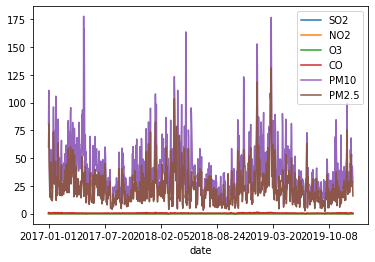

In [ ]:
df_air.plot(x='date')

## **대기물질과 대기오염의 상관관계**

In [ ]:
df = df_air.corr()
df

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,1.000000,0.970874,0.956039,0.276017,0.093885,0.065753
NO2,0.970874,1.000000,0.897964,0.453075,0.224228,0.211617
O3,0.956039,0.897964,1.000000,0.148890,0.087872,0.044888
CO,0.276017,0.453075,0.148890,1.000000,0.638567,0.714808
PM10,0.093885,0.224228,0.087872,0.638567,1.000000,0.840594
PM2.5,0.065753,0.211617,0.044888,0.714808,0.840594,1.000000


index와 columns 가 동일한 값으로 들어있는 것을 볼 수 있다.
​

A와 B 의 상관계수가 1에 가까워질 수록, 하나가 증가할때 다른 하나도 함께 증가하는 경향이 나타나고, -1에 가까워질 수록 하나가 증가하면 다른 하나가 감소하는 경향이 있다는 의미이다.​

row번호와 column 번호가 동일할때에는, 내 자신에 대한 상관계수 이므로 항상 1이 나온다. (항상 함께 증가 or 함께 감소)

## **시각화**

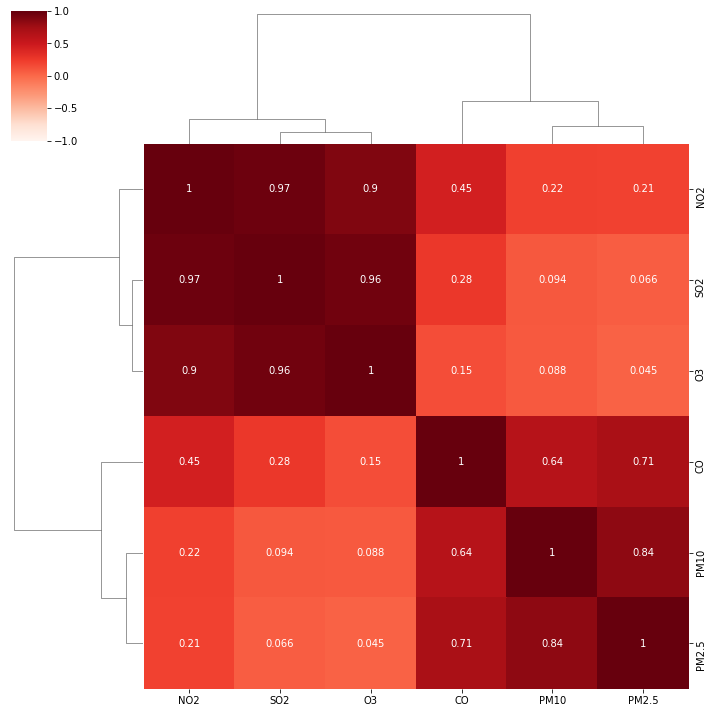

In [ ]:
sns.clustermap(df,
               annot = True, 
               cmap = 'Reds',
               vmin = -1, vmax = 1
              )

sns.clustermap() 을 활용하면, sns.heatmap 을 사용한 것과 동일하게 색상으로 나타내주고, 행과 열별로 비슷한 항목들을 묶어준다.

위의 clustermap을 보면 PM10(미세먼지) 농도가 높을 때, 대체로 PM2.5(초미세먼지)의 농도도 높은 상관관계 등을 알 수 있다.

## **산점도**

[]

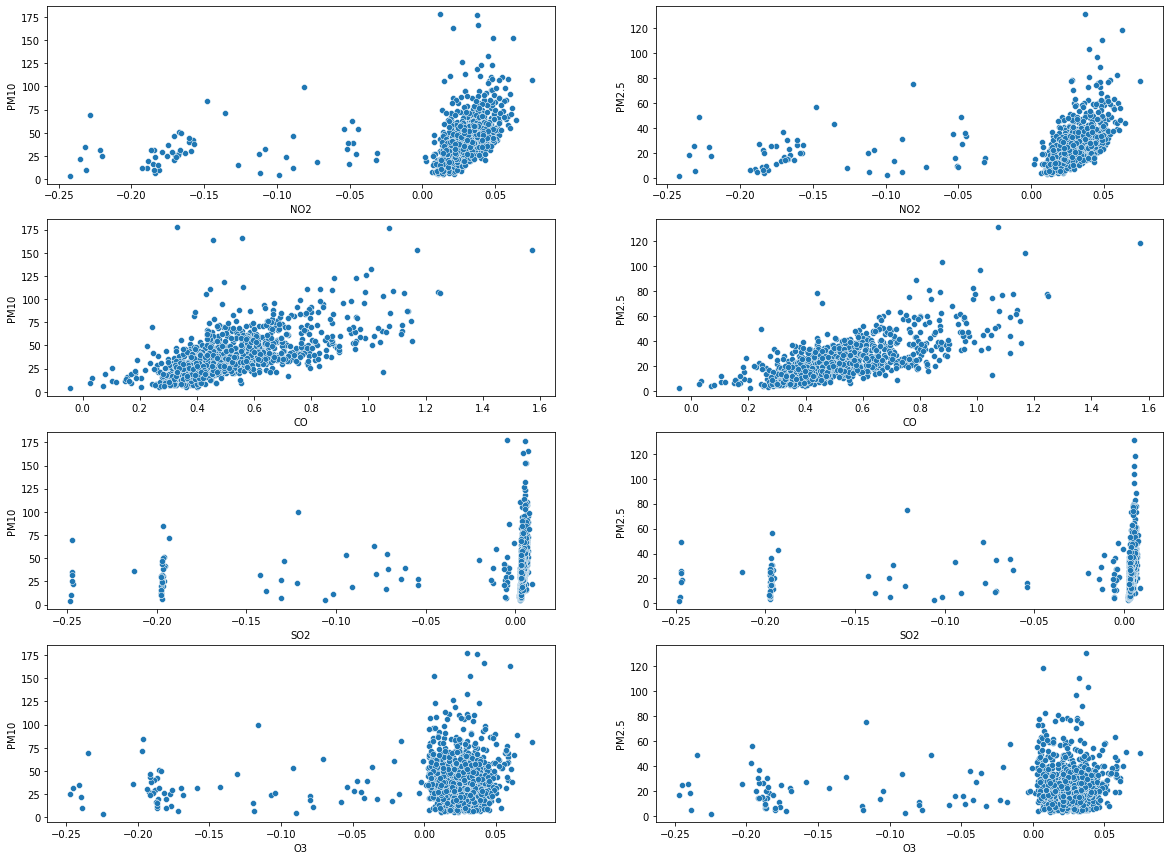

In [ ]:
f, ax = plt.subplots(4, 2, figsize=(20,15))
sns.scatterplot(x='NO2', y= 'PM10', data=df_air, ax=ax[0,0])
sns.scatterplot(x='NO2', y= 'PM2.5', data=df_air, ax=ax[0,1])
sns.scatterplot(x='CO', y= 'PM10', data=df_air, ax=ax[1,0])
sns.scatterplot(x='CO', y= 'PM2.5', data=df_air, ax=ax[1,1])
sns.scatterplot(x='SO2', y= 'PM10', data=df_air, ax=ax[2,0])
sns.scatterplot(x='SO2', y= 'PM2.5', data=df_air, ax=ax[2,1])
sns.scatterplot(x='O3', y= 'PM10', data=df_air, ax=ax[3,0])
sns.scatterplot(x='O3', y= 'PM2.5', data=df_air, ax=ax[3,1])
plt.plot()

산점도를 보면 NO2, CO의 값이 미세먼지, 초미세먼지의 농도와 상관관계가 높음을 확인할 수 있다.

따라서 대기오염은 NO2, CO의 값에 영향을 받고, 특히 CO는 대기오염에 많은 영향을 끼치는 것을 알 수 있다.

[]

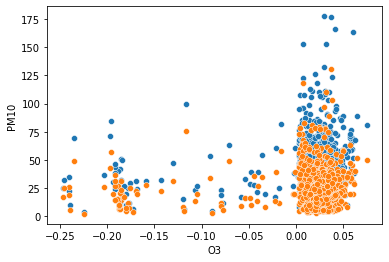

In [ ]:
sns.scatterplot(x='O3', y= 'PM10', data=df_air)
sns.scatterplot(x='O3', y= 'PM2.5', data=df_air)
plt.plot()

O3의 농도에 따른 대기오염의 영향은 적은 것으로 보여진다.

[]

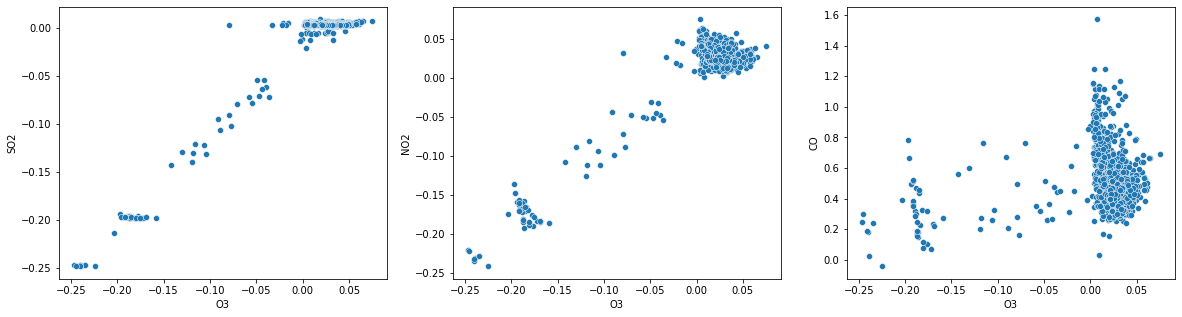

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='O3', y= 'SO2', data=df_air, ax=ax[0])
sns.scatterplot(x='O3', y= 'NO2', data=df_air, ax=ax[1])
sns.scatterplot(x='O3', y= 'CO', data=df_air, ax=ax[2])
plt.plot()

그러나 O3는 SO2, NO2와 높은 상관관계를 보이며 경향성을 보여주는 것으로 판단된다.

즉, O3는 대기오염에 직접적인 영향을 주는 것처럼 보이진 않지만, SO2, NO2에 영향을 주어 간접적으로 대기오염에 영향을 미치는 것으로 판단된다.

## **미세먼지 농도값 상위 10개 주소값에 따라 알아보기**

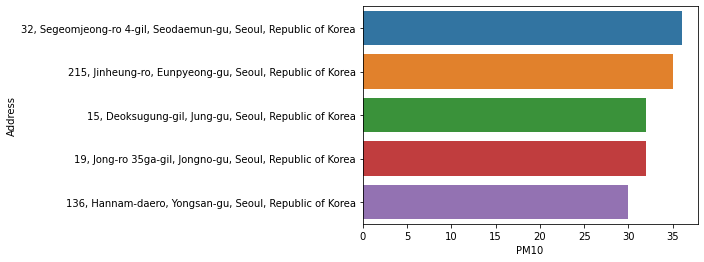

In [ ]:
df_PM10_Address = df_summary.groupby('Address').agg({'PM10' :
'median'}).nlargest(10,'PM10').reset_index()


sns.barplot(y="Address", x="PM10", data = df_PM10_Address)

## **초미세먼지 농도값 상위 10개 주소값에 따라 알아보기**

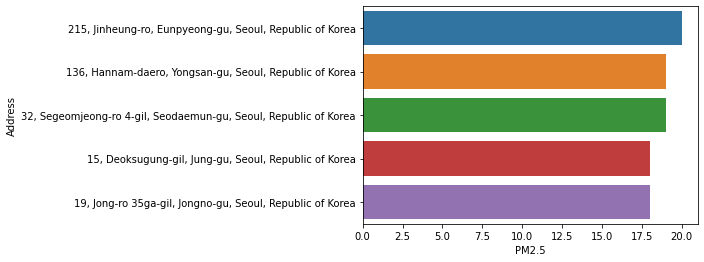

In [ ]:
df_PM25_Address = df_summary.groupby('Address').agg({'PM2.5' : 
'median'}).nlargest(10,'PM2.5').reset_index()


sns.barplot(y="Address", x="PM2.5", data = df_PM25_Address)